# Scientific Computing with Python (Second Edition)

# Chapter 07

*We start by importing all from Numpy. As explained in Chapter 01 the examples are written assuming this import is initially done.*


In [1]:
from numpy import *

## 7.1 Functions in mathematics and functions in Python

In [2]:
def subtract(x1, x2):
    return x1 - x2

In [3]:
r = subtract(5.0, 4.3)
r

0.7000000000000002

## 7.2 Parameters and arguments
### 7.2.1 Passing arguments – by position and by keyword


In [4]:
z = 3 
e = subtract(5,z)
e

2

In [5]:
z = 3 
e = subtract(x2 = z, x1 = 5)
e

2

### 7.2.2 Changing arguments

In [6]:
def subtract(x1, x2):
    z = x1 - x2
    x2 = 50.
    return z
a = 20.
b = subtract(10, a)    # returns -10
a    # still has the value 20

20.0

In [7]:
def subtract(x):
    z = x[0] - x[1]
    x[1] = 50.
    return z
a = [10,20]
b = subtract(a)    # returns -10
a    # is now [10, 50.0]

[10, 50.0]

### 7.2.3 Access to variables defined outside the local namespace

In [8]:
import numpy as np # here the variable np is defined
def sqrt(x):
    return np.sqrt(x) # we use np inside the function

In [9]:
a = 3
def multiply(x):
    return a * x # bad style: access to the variable a defined outside

In [10]:
a=3
multiply(4)  # returns 12

12

In [11]:
a=4  
multiply(4)  # returns 16

16

In [12]:
def multiply(x, a):
    return a * x

### 7.2.4 Default arguments

In [13]:
import scipy.linalg as sl
sl.norm(identity(3))
sl.norm(identity(3), ord = 'fro')
sl.norm(identity(3), 'fro')

1.7320508075688772

In [14]:
def subtract(x1, x2 = 0): 
    return x1 - x2

In [15]:
def my_list(x1, x2 = []):
    x2.append(x1)
    return x2
my_list(1)  # returns [1]

[1]

In [16]:
my_list(2)  # returns [1,2]

[1, 2]

### 7.2.5 Variable number of arguments

In [17]:
data = [[1,2],[3,4]]    
style = dict({'linewidth':3,'marker':'o','color':'green'})

In [18]:
%matplotlib notebook
from matplotlib.pyplot import plot

<IPython.core.display.Javascript object>


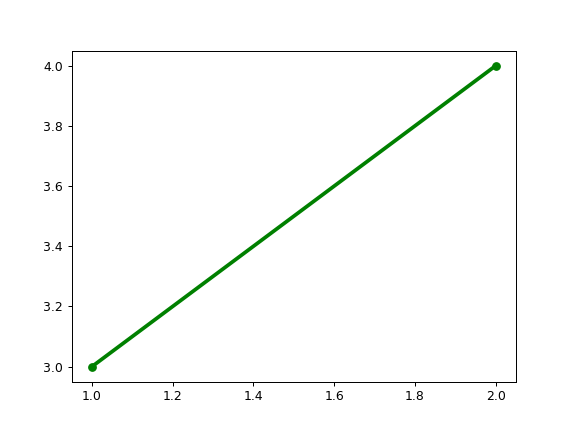

In [19]:
plot(*data,**style)

## 7.3 Return values

In [20]:
def complex_to_polar(z):
    r = sqrt(z.real ** 2 + z.imag ** 2)
    phi = arctan2(z.imag, z.real)
    return (r,phi)  # here the return object is formed

In [21]:
z = 3 + 5j  # here we define a complex number
a = complex_to_polar(z)
r = a[0]
phi = a[1]
r, phi

(5.830951894845301, 1.0303768265243125)

In [22]:
r,phi = complex_to_polar(z)
r, phi

(5.830951894845301, 1.0303768265243125)

In [23]:
def append_to_list(L, x):
    L.append(x)

In [24]:
def function_with_dead_code(x):
    return 2 * x
    y = x ** 2 # these two lines ...
    return y   # ... are never executed!

## 7.4 Recursive functions

In [25]:
def chebyshev(n, x):
    if n == 0:
        return 1.
    elif n == 1:
        return x
    else:
        return 2. * x * chebyshev(n - 1, x) \
                      - chebyshev(n - 2 ,x)

In [26]:
chebyshev(5, 0.52) # returns 0.39616645119999994

0.39616645119999994

## 7.5 Function documentation

In [27]:
def newton(f, x0):
    """
    Newton's method for computing a zero of a function
    on input:
    f  (function) given function f(x)
    x0 (float) initial guess 
    on return:
    y  (float) the approximated zero of f
    """
    ...

In [28]:
help(newton)

Help on function newton in module __main__:

newton(f, x0)
    Newton's method for computing a zero of a function
    on input:
    f  (function) given function f(x)
    x0 (float) initial guess 
    on return:
    y  (float) the approximated zero of f



## 7.6 Functions are objects

In [29]:
def square(x):
    """
    Return the square of x
    """
    return x ** 2
square(4) # 16
sq = square # now sq is the same as square
sq(4) # 16
del square # square doesn't exist anymore
print(newton(sq, .2)) # passing as argument

None


### 7.6.1 Partial application

In [30]:
import functools 
def sin_omega(t, freq):
    return sin(2 * pi * freq * t)

def make_sine(frequency):
    return functools.partial(sin_omega, freq = frequency)

fomega=make_sine(0.25)
fomega(3) # returns -1.0

-1.0

### 7.6.2 Using closures

In [31]:
def make_sine(freq):
    "Make a sine function with frequency freq"
    def mysine(t):
        return sin_omega(t, freq)
    return mysine

## 7.7 Anonymous functions – the keyword lambda

In [32]:
import scipy.integrate as si
si.quad(lambda x: x ** 2 + 5, 0, 1)

(5.333333333333333, 5.921189464667501e-14)

In [33]:
parabola = lambda x: x ** 2 + 5
parabola(3) # gives 14

14

### 7.7.1 The lambda construction is always replaceable

In [34]:
parabola = lambda x: x**2+5 
# the following code is equivalent
def parabola(x):
    return x ** 2 + 5

In [35]:
import scipy.integrate as si
for iteration in range(3):
    print(si.quad(lambda x: sin_omega(x, iteration*pi), 0, pi/2.) )

(0.0, 0.0)
(0.004191640273463963, 1.1115764244561913e-14)
(0.008036465645038323, 1.0934118293721024e-14)


## 7.8 Functions as decorators


In [36]:
def how_sparse(A):
    return len(A.reshape(-1).nonzero()[0])

In [37]:
def cast2array(f):
    def new_function(obj):
        fA = f(array(obj))
        return fA
    return new_function

In [38]:
@cast2array
def how_sparse(A):
    return len(A.reshape(-1).nonzero()[0])